Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.40129 154.079; 7.90512 155.144; … ; 7.74637 154.503; 7.55024 154.431]

Union{Missing, Float64}[7.87255 155.029; 8.10928 154.302; … ; 7.88727 153.773; 7.89302 153.637]

Union{Missing, Float64}[7.80178 154.34; 7.95854 155.161; … ; 7.89541 154.845; 7.7061 154.765]

Union{Missing, Float64}[7.48708 154.86; 7.70923 154.938; … ; 8.08655 154.016; 7.62978 154.007]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean       SD       Naive SE       MCSE      ESS
sigma   7.76855 0.29269266 0.0046278773 0.0057953841 1000
   mu 154.61207 0.41915412 0.0066274085 0.0076935977 1000

Quantiles:
         2.5%       25.0%      50.0%      75.0%       97.5%  
sigma   7.212313   7.568465   7.763255   7.9698225   8.339855
   mu 153.810975 154.333000 154.607000 154.8950000 155.440100



Plot the density of posterior draws

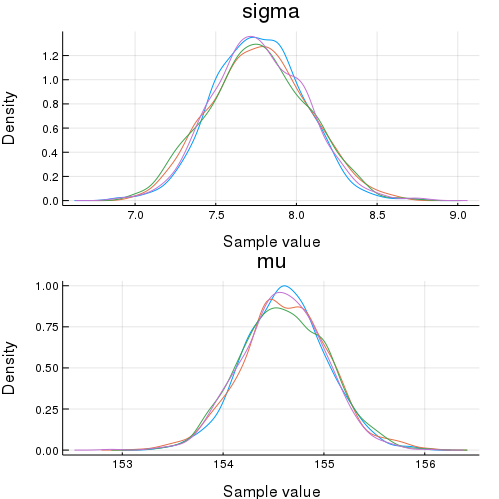

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.16286988303403394
 0.07619695874277468

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
 1.0        0.0485392
 0.0485392  1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*